In [16]:
%matplotlib inline


# Plot different SVM classifiers in the iris dataset


Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.


In [17]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
print(iris.DESCR)


Automatically created module for IPython interactive environment
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute V

SVC with linear kernel
,               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.76      0.72      0.74        18
           2       0.58      0.64      0.61        11

    accuracy                           0.80        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.80      0.80      0.80        45

LinearSVC (linear kernel)
,               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.75      0.33      0.46        18
           2       0.45      0.82      0.58        11

    accuracy                           0.69        45
   macro avg       0.71      0.72      0.67        45
weighted avg       0.74      0.69      0.67        45

SVC with RBF kernel
,               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      0.56      0.67        18


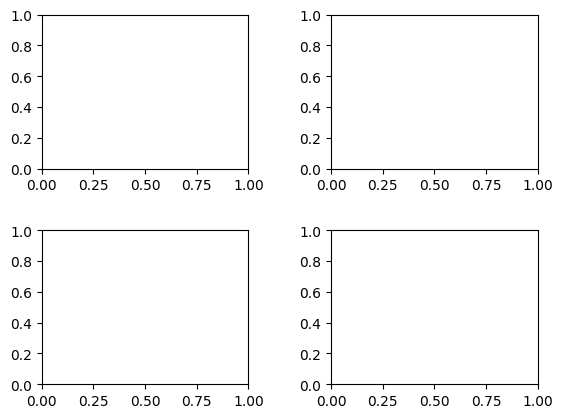

In [18]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          RandomForestClassifier())
models = (clf.fit(x_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'Random Forest')

y_pred_models = (clf.predict(x_test) for clf in models)

for i, y_pred in enumerate(y_pred_models):
    print(f'{titles[i]}\n, {classification_report(y_test, y_pred)}')



# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_test[:, 0], x_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()